In [0]:
# import the necessary packages
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import pandas as pd
import imutils
import cv2
import sklearn
import zipfile
import itertools
import random
import os,shutil
from keras.preprocessing import image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os
from PIL import Image

FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color



Using TensorFlow backend.


In [4]:
!kaggle competitions download -c dogs-vs-cats -p /content/gdrive/My\ Drive/kaggle/dogs-vs-cats

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 11, in <module>
    load_entry_point('kaggle==1.5.3', 'console_scripts', 'kaggle')()
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 489, in load_entry_point
    return get_distribution(dist).load_entry_point(group, name)
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 2793, in load_entry_point
    return ep.load()
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 2411, in load
    return self.resolve()
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 2417, in resolve
    module = __import__(self.module_name, fromlist=['__name__'], level=0)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 116, in authenticate
    self.config_file, self.config_d

In [0]:
#cd gdrive/My\ Drive/kaggle/dogs-vs-cats  #change dir
!mkdir gdrive/My\ Drive/kaggle/dogs-vs-cats/train  #create a directory named train/
!mkdir gdrive/My\ Drive/kaggle/dogs-vs-cats/test  #create a directory named test/
!unzip gdrive/My\ Drive/kaggle/dogs-vs-cats/train.zip -d gdrive/My\ Drive/kaggle/dogs-vs-cats/train/  #unzip data in train/
!unzip gdrive/My\ Drive/kaggle/dogs-vs-cats/test1.zip -d gdrive/My\ Drive/kaggle/dogs-vs-cats/test/  #unzip data in test/


Output hidden; open in https://colab.research.google.com to view.

In [0]:
filenames = os.listdir("gdrive/My Drive/kaggle/dogs-vs-cats/train/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

OSError: ignored

In [0]:
df.head()

category      filename
0         0  cat.9112.jpg
1         1  dog.8883.jpg
2         0  cat.3577.jpg
3         1  dog.8087.jpg
4         1   dog.855.jpg

In [0]:
df.tail()

category       filename
24995         0   cat.9757.jpg
24996         1  dog.10297.jpg
24997         0   cat.8742.jpg
24998         0  cat.10584.jpg
24999         0   cat.1585.jpg

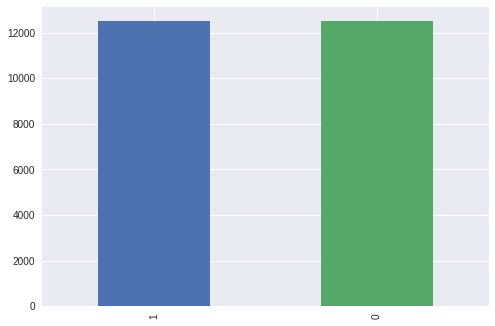

In [0]:
df['category'].value_counts().plot.bar()

In [0]:
sample = random.choice(filenames)
trainPath="gdrive/My Drive/kaggle/dogs-vs-cats/train/train/"
im = image.load_img(trainPath+sample)
plt.imshow(im)
image_to_feature_vector(im)

TypeError: ignored

In [0]:




def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
    #img = cv2.imread(img_path,0)
    x = image.img_to_array(img)
    return np.expand_dims(x, axis=0)



In [0]:
filenames = os.listdir("gdrive/My Drive/kaggle/dogs-vs-cats/train/train")
raws = []
for filename in filenames:
    im = Image.open(trainPath+filename) # Can be many different formats.
    pix = im.load()
    pixel_values = list(im.getdata())  
    imArr=np.array(pixel_values).flatten()
    raws.append(imArr)

In [0]:
filenames = os.listdir("gdrive/My Drive/kaggle/dogs-vs-cats/test/test1")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df_test = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [0]:
knn=KNeighborsClassifier(n_neighbors=2).fit(train_tensors,traintargets)
predictions=knn.predict(testfiles)
testTargets=df_test['category']

NameError: ignored

In [0]:
# evaluate the model
score = knn.score(valData, valLabels)
print("k=%d, accuracy=%.2f%%" % (k, score * 100))


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEGHT, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(133, activation='softmax'))
model.summary()